<h1>Machine Learning - Laboratory 4 - Movie Ranking</h1>

<p><b>Note</b> - Run All scripts before<p>

<h3>Exc. 1-5 - Prepare data</h3>

<p>Data preparation stage consists of:</p>

In [140]:
import pandas as pd

# Read File Data
with open('positive.txt', 'r', encoding='utf-8') as file:
    positive_data = file.readlines()

with open('negative.txt', 'r', encoding='utf-8') as file:
    negative_data = file.readlines()

# Create dataframe with class (0 - positive, 1 - negative)
df_positive = pd.DataFrame({'text': positive_data, 'class': 0})
df_negative = pd.DataFrame({'text': negative_data, 'class': 1})

# Connect positive and negative dataframes
df = pd.concat([df_positive, df_negative], ignore_index=True)

# Shuffle dataframe
df = df.sample(frac=1).reset_index(drop=True)
print(df.head())

                                                text  class
0  Przemyślana symbolika. Każdy element ma swoje ...      0
1      Film, który zbyt długo się ciągnie. Słabni...      1
2       Bezsensowna historia i kiepskie wykonanie.\n      1
3  Doskonałe ujęcia kamery. Wizualnie film prezen...      0
4  Nudna i monotonna ścieżka dźwiękowa. Muzyka ni...      1


In [141]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer object
vectorizer = CountVectorizer()

# Processing and transformation of documents with Bag of Words method
bow = vectorizer.fit_transform(df['text'])
dictionary = vectorizer.get_feature_names_out()

df['words'] = list(bow.toarray())
print(df)

                                                  text  class  \
0    Przemyślana symbolika. Każdy element ma swoje ...      0   
1        Film, który zbyt długo się ciągnie. Słabni...      1   
2         Bezsensowna historia i kiepskie wykonanie.\n      1   
3    Doskonałe ujęcia kamery. Wizualnie film prezen...      0   
4    Nudna i monotonna ścieżka dźwiękowa. Muzyka ni...      1   
..                                                 ...    ...   
180  Długo zapadający w pamięć. Do tego świetna reż...      0   
181  Wciągająca fabuła. Trudno przewidzieć, co wyda...      0   
182  Chaotyczny montaż. Trudno zrozumieć chronologi...      1   
183  Film, który traci sens w drugiej połowie. Fabu...      1   
184      Wielkie rozczarowanie. Myślałem, że będzie...      1   

                                                 words  
0    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
1    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
2    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [142]:
# calculate words occurances
word_count = dict.fromkeys(dictionary, 0)

for row in df['words']:
    for i, word in enumerate(dictionary):
        if(row[i] == 1):
            word_count[word] +=1

sorted_word_count = sorted_positive_word_count = {k: v for k, v in sorted(word_count.items(), key=lambda item: item[1], reverse=True)}
print(sorted_word_count)

{'film': 55, 'się': 43, 'nie': 39, 'brak': 25, 'do': 23, 'na': 23, 'który': 20, 'fabuła': 19, 'jest': 17, 'że': 16, 'trudno': 15, 'zbyt': 12, 'dialogi': 11, 'są': 11, 'co': 10, 'efekty': 8, 'ma': 8, 'między': 8, 'postaci': 8, 'aktorzy': 7, 'emocje': 7, 'kiepskie': 7, 'narracji': 7, 'po': 7, 'postacie': 7, 'trzyma': 7, 'widać': 7, 'filmu': 6, 'mnie': 6, 'sensu': 6, 'tempo': 6, 'to': 6, 'czasu': 5, 'długo': 5, 'kiepsko': 5, 'które': 5, 'muzyka': 5, 'nic': 5, 'od': 5, 'sceny': 5, 'specjalne': 5, 'wspaniała': 5, 'zakończenie': 5, 'absolutnie': 4, 'akcja': 4, 'aktorstwo': 4, 'coś': 4, 'czułem': 4, 'dobór': 4, 'doskonałe': 4, 'drugiej': 4, 'dźwiękowa': 4, 'głębi': 4, 'historia': 4, 'historii': 4, 'jak': 4, 'każda': 4, 'każdy': 4, 'klimat': 4, 'napięciu': 4, 'nieciekawe': 4, 'niektóre': 4, 'pełen': 4, 'poziomie': 4, 'połowie': 4, 'przewidywalna': 4, 'robi': 4, 'rozwija': 4, 'ujęcia': 4, 'uwierzyć': 4, 'wiele': 4, 'wszystko': 4, 'wydarzy': 4, 'znakomicie': 4, 'zrealizowane': 4, 'ścieżka': 4, '

In [143]:
# calculate word occurances for positive and negative data

positive_word_count = dict.fromkeys(dictionary, 0)
negative_word_count = dict.fromkeys(dictionary, 0)

df_positive = df.loc[df['class'] == 0]
df_negative = df.loc[df['class'] == 1]

for row in df_positive['words']:
    for i, word in enumerate(dictionary):
        if(row[i] == 1):
            positive_word_count[word] +=1

for row in df_negative['words']:
    for i, word in enumerate(dictionary):
        if(row[i] == 1):
            negative_word_count[word] +=1

sorted_positive_word_count = {k: v for k, v in sorted(positive_word_count.items(), key=lambda item: item[1], reverse=True)}
sorted_negative_word_count = {k: v for k, v in sorted(negative_word_count.items(), key=lambda item: item[1], reverse=True)}

print("Sorted")
print(sorted_positive_word_count)
print(sorted_negative_word_count)

Sorted
{'film': 26, 'się': 20, 'do': 14, 'na': 13, 'który': 9, 'nie': 8, 'emocje': 7, 'fabuła': 7, 'jest': 7, 'że': 7, 'ma': 6, 'między': 5, 'od': 5, 'wspaniała': 5, 'akcja': 4, 'aktorzy': 4, 'doskonałe': 4, 'każda': 4, 'napięciu': 4, 'pełen': 4, 'rozwija': 4, 'tempo': 4, 'trudno': 4, 'trzyma': 4, 'znakomicie': 4, 'absolutnie': 3, 'bardzo': 3, 'chemia': 3, 'cieszę': 3, 'co': 3, 'coś': 3, 'dialogi': 3, 'doskonale': 3, 'efekty': 3, 'filmowi': 3, 'filmu': 3, 'go': 3, 'historii': 3, 'humoru': 3, 'intensywne': 3, 'kapitalne': 3, 'kapitalny': 3, 'każdy': 3, 'klimat': 3, 'mnie': 3, 'najwyższym': 3, 'naprawdę': 3, 'narracji': 3, 'obejrzeniu': 3, 'oddali': 3, 'po': 3, 'postaci': 3, 'poziomie': 3, 'reżyseria': 3, 'są': 3, 'tego': 3, 'to': 3, 'zakończenie': 3, 'zapomnieć': 3, 'znaczenie': 3, 'świetna': 3, 'akcji': 2, 'aktorami': 2, 'aktorska': 2, 'aktorstwo': 2, 'aktorów': 2, 'balans': 2, 'cały': 2, 'charakteryzacja': 2, 'chwili': 2, 'ciekawe': 2, 'dobrze': 2, 'dramatem': 2, 'dynamiczna': 2, 'dzi

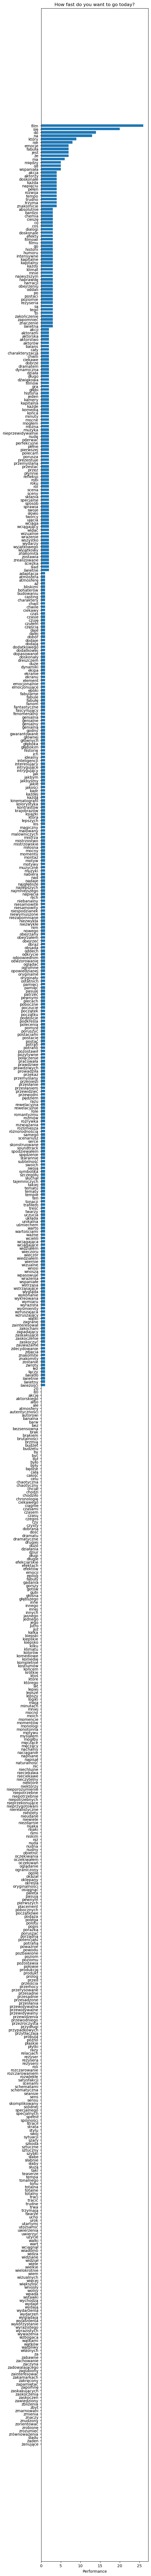

In [144]:
# Plot data
import matplotlib.pyplot as plt

words = list(sorted_positive_word_count.keys())
count = list(sorted_positive_word_count.values()) 
 
# Figure Size
fig, ax = plt.subplots(figsize =(5,120))
 
# Horizontal Bar Plot
ax.barh(words, count, align='center')
#ax.set_yticks(words, labels=people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Word Count')
ax.set_title('Positive Words?')
# Show Plot
plt.show()

words = list(sorted_negative_word_count.keys())
count = list(sorted_negative_word_count.values()) 
 
# Figure Size
fig, ax = plt.subplots(figsize =(5,120))
 
# Horizontal Bar Plot
ax.barh(words, count, align='center')
#ax.set_yticks(words, labels=people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Word Count')
ax.set_title('Positive Words?')
# Show Plot
plt.show()